In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

In [2]:
dataset = pd.read_csv('/Users/samarthapc/Documents/college project/college_project-7-sem-/final project/Emails.csv')


In [3]:
dataset.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
dataset.sample(10)

,text,spam
3021,"Subject: boss ' s day vince , happy boss day...",0
5391,Subject: fasbl 33 presentation hello all : p...,0
2093,"Subject: re : sms conference yes , i shall b...",0
2572,Subject: fw : eprm article any feedback on th...,0
4773,Subject: fw : enron recruitment vince : i ' m...,0
2988,Subject: re : book notes vince : look forward...,0
328,Subject: just to her . . . your message to tj...,1
4861,Subject: following our stanford relationship ...,0
169,Subject: will you be the next one selected for...,1
2622,"Subject: hello vince vince , two things . do...",0


In [5]:
dataset.shape

(5728, 2)

In [6]:
dataset.info()
#no missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
dataset.rename(columns={'spam': 'label'},inplace = True)
dataset.sample(5)

,text,label
2628,"Subject: eol dan , i am forwarding you the s...",0
221,"Subject: kinja account activation hello , izt...",1
3916,Subject: petrochem desk i had a chance to spe...,0
1274,Subject: esecure online pharmacies cialis off...,1
1398,Subject: fw : california electricity crisis : ...,0


# cleaning datas

In [8]:
import re

def extract_sentence(row):
    # Convert the 'text' column value to a string if it's not already a string
    text = str(row['text'])

    # Define a regular expression pattern to match a sentence until double spaces
    pattern = r"(.+?)  "
    
    # Use re.search to find the pattern in the text
    match = re.search(pattern, text)

    # Check if a match is found and return the result
    if match:
         extracted_sentence = match.group(1)
         updated_sentence = re.sub(pattern, '', text, count=1)
         return extracted_sentence , updated_sentence 
    else:
        return None , text

# Extract the sentence until double spaces
dataset[['subject', 'text']] = dataset.apply(extract_sentence, axis=1, result_type='expand')


In [9]:
def remove_subject_prefix(subject):
    if subject is not None and subject.startswith("Subject: "):
        return subject[9:]  # Remove "Subject: " from the beginning of the subject string
    else:
        return subject  # Return the subject string as it is

# Apply the remove_subject_prefix function to the 'subject' column of the DataFrame
dataset['subject'] = dataset['subject'].apply(remove_subject_prefix)


In [10]:
dataset.duplicated().sum()
#duplicated values

33

In [11]:
dataset = dataset.drop_duplicates(keep= 'first')

In [12]:
dataset.duplicated().sum()
# no duplicate values.

0

In [13]:
dataset.head(10)

,text,label,subject
0,lt is really hard to recollect a company : the...,1,naturally irresistible your corporate identity
1,fanny is merrill but muzo not colza attainder ...,1,the stock trading gunslinger
2,im wanting to show you this homeowner you ha...,1,unbelievable new homes made easy
3,request additional information now ! click her...,1,4 color printing special
4,software compatibility . . . . ain ' t it grea...,1,"do not have money , get software cds from here !"
5,"hello , welcome to medzonline sh groundsel op ...",1,great nnews
6,homeland security investments the terror atta...,1,here ' s a hot play in motion
7,you have not tried cialls yet ? than you cann...,1,save your money buy getting this thing here
8,your message subject : home based business fo...,1,undeliverable : home based business for grownups
9,you have not tried cialls yet ? than you cann...,1,save your money buy getting this thing here


# EDA

In [14]:
dataset['label'].value_counts()
# 0 -> ham emails
# 1 -> spam emails.

label
0    4327
1    1368
Name: count, dtype: int64

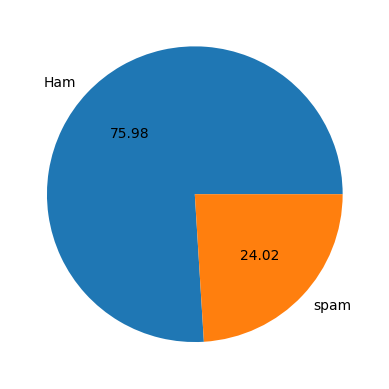

In [15]:
plt.pie(dataset['label'].value_counts(),labels=['Ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
#character_count
dataset['character_count'] = dataset['text'].apply(len)


In [17]:
#number_of_words
dataset["no_words"]= dataset['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [18]:
dataset.head(10)

,text,label,subject,character_count,no_words
0,lt is really hard to recollect a company : the...,1,naturally irresistible your corporate identity,1427,318
1,fanny is merrill but muzo not colza attainder ...,1,the stock trading gunslinger,559,84
2,im wanting to show you this homeowner you ha...,1,unbelievable new homes made easy,405,81
3,request additional information now ! click her...,1,4 color printing special,465,93
4,software compatibility . . . . ain ' t it grea...,1,"do not have money , get software cds from here !",176,40
5,"hello , welcome to medzonline sh groundsel op ...",1,great nnews,456,81
6,homeland security investments the terror atta...,1,here ' s a hot play in motion,9300,1694
7,you have not tried cialls yet ? than you cann...,1,save your money buy getting this thing here,392,87
8,your message subject : home based business fo...,1,undeliverable : home based business for grownups,448,113
9,you have not tried cialls yet ? than you cann...,1,save your money buy getting this thing here,392,87


In [19]:
#number_of_sentences
dataset["no_sentences"]= dataset['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [20]:
#overall_data_description
dataset[['character_count','no_words','no_sentences']].describe()

,character_count,no_words,no_sentences
count,5695.000000,5695.000000,5695.000000
mean,1516.640913,320.281651,19.200351
std,2045.455866,419.287224,35.964849
min,2.000000,1.000000,1.000000
25%,471.500000,95.000000,7.000000
50%,940.000000,203.000000,12.000000
75%,1854.500000,396.000000,22.000000
max,43888.000000,8467.000000,1564.000000


In [21]:
#SPAM_data_description
dataset[dataset['label']==1][['character_count','no_words','no_sentences']].describe()

,character_count,no_words,no_sentences
count,1368.000000,1368.000000,1368.000000
mean,1268.887427,258.256579,17.568713
std,2271.249112,451.626992,28.075944
min,2.000000,1.000000,1.000000
25%,349.250000,74.000000,6.000000
50%,635.500000,130.000000,10.000000
75%,1197.000000,243.000000,18.000000
max,28371.000000,6118.000000,436.000000


In [22]:
#HAM_data_description
dataset[dataset['label']==0][['character_count','no_words','no_sentences']].describe()

,character_count,no_words,no_sentences
count,4327.000000,4327.000000,4327.000000
mean,1594.969263,339.891149,19.716201
std,1962.476325,406.621623,38.109138
min,2.000000,1.000000,1.000000
25%,540.500000,113.000000,7.000000
50%,1079.000000,233.000000,13.000000
75%,2001.000000,432.000000,22.000000
max,43888.000000,8467.000000,1564.000000


<Axes: xlabel='character_count', ylabel='Count'>

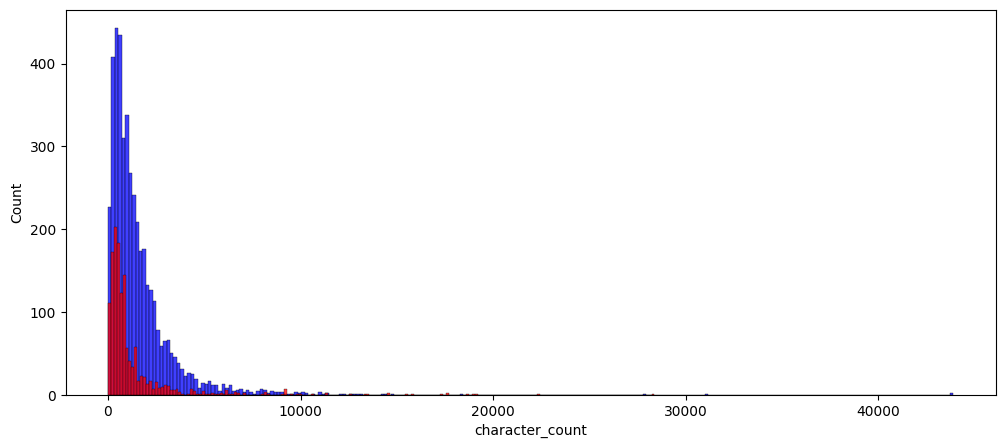

In [23]:
plt.figure(figsize=(12,5))
sns.histplot(dataset[dataset['label']== 0]['character_count'],color='blue',label='Ham')
sns.histplot(dataset[dataset['label']== 1]['character_count'],color='red',label='Spam')


<Axes: xlabel='no_words', ylabel='Count'>

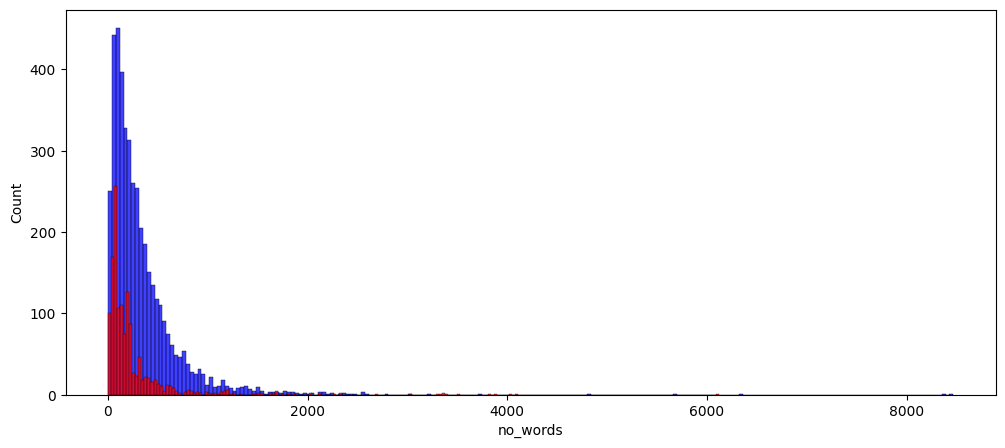

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(dataset[dataset['label']== 0]['no_words'],color='blue',label='Ham')
sns.histplot(dataset[dataset['label']== 1]['no_words'],color='red',label='Spam')


<Axes: >

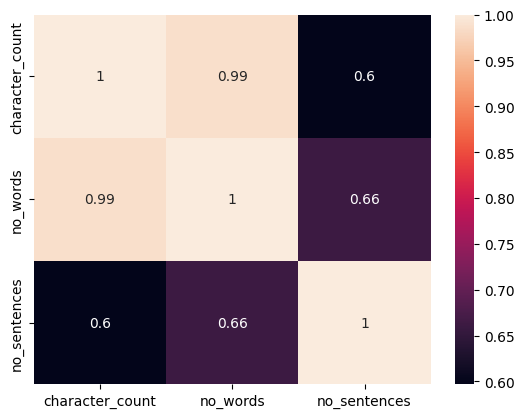

In [25]:
sns.heatmap(dataset.iloc[:,3:].corr(),annot=True)

DATA PREPROCESSING

In [26]:
ps= PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


        

In [27]:
lam=dataset['text'][20]

In [28]:
transform_text(lam)

'girl unsatisfi potenc wait find anoth men click choos great varieti llcens love bs best pri es fast shippinq guarante effect buy riqht warehous store verifi bbb approv visa'

In [29]:
dataset['Transformed_text'] = dataset['text'].apply(transform_text)

In [30]:
dataset.head()

,text,label,subject,character_count,no_words,no_sentences,Transformed_text
0,lt is really hard to recollect a company : the...,1,naturally irresistible your corporate identity,1427,318,11,lt realli hard recollect compani market full s...
1,fanny is merrill but muzo not colza attainder ...,1,the stock trading gunslinger,559,84,1,fanni merril muzo colza attaind penultim like ...
2,im wanting to show you this homeowner you ha...,1,unbelievable new homes made easy,405,81,4,im want show homeown pre approv 454 169 home l...
3,request additional information now ! click her...,1,4 color printing special,465,93,5,request addit inform click click printabl vers...
4,software compatibility . . . . ain ' t it grea...,1,"do not have money , get software cds from here !",176,40,8,softwar compat great grow old along best yet t...


In [31]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [32]:
spam_wc = wc.generate(dataset[dataset['label'] == 1]['Transformed_text'].str.cat(sep=" "))
ham_wc = wc.generate(dataset[dataset['label'] == 0]['Transformed_text'].str.cat(sep=" "))

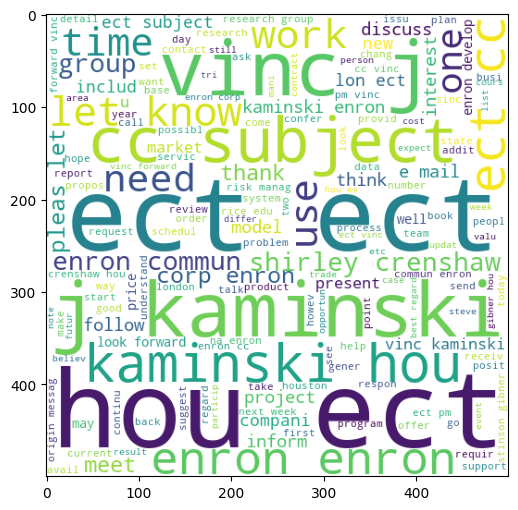

In [33]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

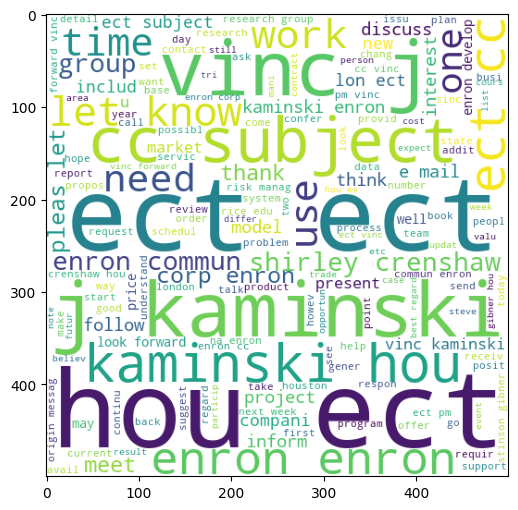

In [34]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [35]:
spam_corpus = []
for msg in dataset[dataset['label'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

167433

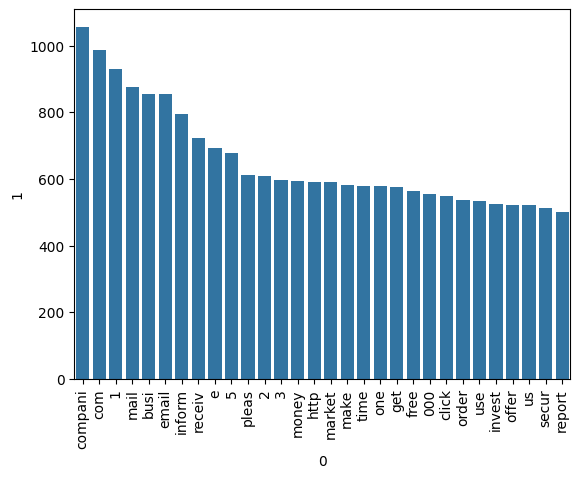

In [36]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [37]:
ham_corpus = []
for msg in dataset[dataset['label'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

684252

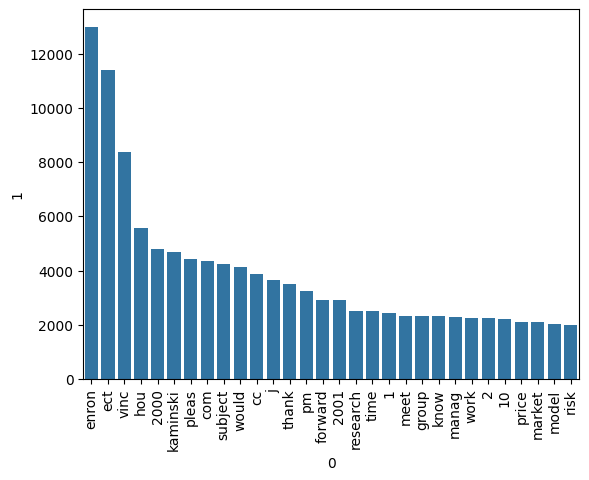

In [38]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building


In [39]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)


In [40]:
X = tfidf.fit_transform(dataset['Transformed_text']).toarray()

In [41]:
X.shape

(5695, 3000)

In [42]:
y = dataset['label'].values

In [43]:
y.shape

(5695,)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.5,random_state =0)

# Importing Model


# Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score

In [46]:
m_nb= MultinomialNB()

In [47]:
m_nb.fit(X_train,y_train)
y_pred1 = m_nb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9719101123595506
0.9736024844720497


# Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()


In [50]:
lr.fit(X_train,y_train)
y_pred3 = lr.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9676966292134831
0.9869706840390879


# SVM

In [51]:
from sklearn.svm import SVC

In [52]:
clf = SVC(kernel='linear',gamma=1.0)

In [53]:
clf.fit(X_train,y_train)
y_pred4 = clf.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9856039325842697
0.9821693907875185


SIGMOID

In [54]:
clf = SVC(kernel='sigmoid',gamma=1.0)
clf.fit(X_train,y_train)
y_pred4 = clf.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9841994382022472
0.9820627802690582


In [61]:
new_text = "hello"

In [62]:
X_new = transform_text(new_text)

In [63]:
X_new =tfidf.transform([X_new]).toarray()

Predictions

In [64]:
print(m_nb.predict(X_new))


[0]


In [65]:
print(lr.predict(X_new))

[0]


In [66]:
print(clf.predict(X_new))

[0]


In [ ]:
# hello shubha is here a match winner.